In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
event_log = pd.read_csv('\\\sysdatprod1\\Cartridge Complaint Data\\GEM5000\\16020221\\000000000500207812\\000000000500207812_20211001_101205\\EVENT_LOG.csv')
sensor_file = pd.read_csv('\\\sysdatprod1\\Cartridge Complaint Data\\GEM5000\\16020221\\000000000500207812\\000000000500207812_20211001_101205\\SENSOR.csv')

In [3]:
event_log.head()

,Date,Time,Event Type,Code,Subcode,Message,Cartridge S/N,Severity
0,2021/04/16,12:49:33,Event,9096,NaN,Sample Ended,500146422.0,NaN
1,2021/04/16,21:21:35,Error,240,73.0,Process control solution not detected.,500146422.0,8.0
2,2021/04/16,21:21:35,Error,240,73.0,Process control solution not detected.,500146422.0,8.0
3,2021/04/17,07:17:04,Alarm,15,NaN,NTP: Unable to reach NTP server.,NaN,NaN
4,2021/04/17,07:19:03,Event,4007,15.0,Alarm cleared: NTP: Unable to reach NTP server..,NaN,NaN


In [4]:
sensor_file.head(10)

,'10/01/21 10:12:06.896','CartAge','CalType','Hct','Na','K','Ca','BUN','Cl','pO2',...,'waveEnd','mean A','mean SD','meanTellTale','maxTellTale','Ne585peakCPS','Ne585intgCPS','f_biliFactor','BiliMeas','BiliCalc'
0,'10/01/21 10:12:06.898','Instrument',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,'10/01/21 10:12:06.900','Script','WARMUP',41.0000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,'10/01/21 10:12:06.903','FPGA',NaN,7.11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,'10/01/21 10:12:06.905','GemScript',NaN,0.904,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,'10/01/21 10:12:06.907','LotNo',NaN,210805G,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,'10/01/21 10:12:06.909','CartSerialNo',NaN,000000000500207812,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,'10/01/21 10:12:06.911','CartCompat',NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,'10/01/21 10:12:06.914',NaN,'CART_TYPE_FULL',NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,'10/01/21 10:12:06.916',NaN,'CAL_POINT_TWO',NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,'10/01/21 10:12:20.432','Script','MEAS_REP_LIMITS_PROD',5.0000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
event_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5000 non-null   object 
 1   Time           5000 non-null   object 
 2   Event Type     5000 non-null   object 
 3   Code           5000 non-null   int64  
 4   Subcode        2552 non-null   float64
 5   Message        5000 non-null   object 
 6   Cartridge S/N  4972 non-null   float64
 7   Severity       1074 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 312.6+ KB


In [6]:
event_log = event_log.dropna(subset=['Cartridge S/N'])

In [7]:
event_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4972 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4972 non-null   object 
 1   Time           4972 non-null   object 
 2   Event Type     4972 non-null   object 
 3   Code           4972 non-null   int64  
 4   Subcode        2546 non-null   float64
 5   Message        4972 non-null   object 
 6   Cartridge S/N  4972 non-null   float64
 7   Severity       1074 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 349.6+ KB


In [8]:
event_log['Cartridge S/N'] = event_log['Cartridge S/N'].astype(int)

In [9]:
event_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4972 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           4972 non-null   object 
 1   Time           4972 non-null   object 
 2   Event Type     4972 non-null   object 
 3   Code           4972 non-null   int64  
 4   Subcode        2546 non-null   float64
 5   Message        4972 non-null   object 
 6   Cartridge S/N  4972 non-null   int32  
 7   Severity       1074 non-null   float64
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 330.2+ KB


In [10]:
extract_CartSerialNo = sensor_file[sensor_file["'CartAge'"]== "'CartSerialNo'"]

In [11]:
CartSerialNo = extract_CartSerialNo["'Hct'"]

In [12]:
CartSerialNo = int(CartSerialNo)

In [13]:
CartSerialNo

500207812

In [14]:
event_log_relavant = event_log[event_log["Cartridge S/N"]==CartSerialNo]

In [15]:
event_log_relavant.head()

,Date,Time,Event Type,Code,Subcode,Message,Cartridge S/N,Severity
4832,2021/10/01,10:12:06,Event,4002,NaN,Cartridge inserted: 000000000500207812. SW Ver...,500207812,NaN
4833,2021/10/01,10:12:06,Event,9099,NaN,Warmup Started,500207812,NaN
4834,2021/10/01,10:15:53,Error,240,73.0,Process control solution not detected.,500207812,8.0
4835,2021/10/01,10:15:54,Error,240,73.0,Process control solution not detected.,500207812,8.0
4836,2021/10/01,10:17:23,Error,230,232.0,Temperature out of range.,500207812,8.0


In [16]:
messages = event_log_relavant['Message'].dropna().to_list()

In [17]:
sensor_failure_messages = []

for i in messages:
    if 'Sensor Disabled by iQM' in i: 
        sensor_failure_messages.append(i)

In [18]:
sensor_failure_messages

['Sensor Disabled by iQM2:B:LAC']

In [19]:
sensor_failure = dict()
for i in sensor_failure_messages: 
    temp = i.split(':')
    fail_type = temp[1]
    fail_substance = temp[2].split(',')
    sensor_failure[fail_type] = fail_substance

In [20]:
sensor_failure

{'B': ['LAC']}

In [21]:
cal_type = "'"+'B'+'-DRIFT'+"'"
print(cal_type)

'B-DRIFT'


In [22]:
sensor_file_relavant = sensor_file[sensor_file["'CalType'"] == cal_type]

In [23]:
sensor_file_relavant.head()

,'10/01/21 10:12:06.896','CartAge','CalType','Hct','Na','K','Ca','BUN','Cl','pO2',...,'waveEnd','mean A','mean SD','meanTellTale','maxTellTale','Ne585peakCPS','Ne585intgCPS','f_biliFactor','BiliMeas','BiliCalc'
53,'10/01/21 10:27:42.285',0.00,'B-DRIFT',nan,nan,nan,nan,NaN,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00406
107,'10/01/21 10:42:47.714',0.00,'B-DRIFT',10.12374,nan,nan,nan,NaN,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.00142
130,'10/01/21 10:47:22.244',0.00,'B-DRIFT',0.18775,nan,nan,nan,NaN,nan,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00080
172,'10/01/21 10:49:57.420',0.00,'B-DRIFT',0.34751,0.48170,0.00539,-0.00031,NaN,1.11141,-3.13512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00111
195,'10/01/21 10:51:19.956',0.00,'B-DRIFT',-0.10052,2.65452,0.02115,0.00486,NaN,-0.31254,1.54989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00218


In [24]:
sensor_file_relavant = sensor_file_relavant.dropna(subset=["'Lac'"])

In [25]:
errs = sensor_file[sensor_file["'CalType'"]=="'ERRS'"]

In [26]:
index = 0
for i, j in enumerate(errs["'Lac'"].to_list()): 
    if j == "'IQMFAILED'": 
        index = i
        break

In [27]:
timestamp = errs.iloc[index:index+1,0:1].values[0][0]

In [28]:
timestamp

"'10/03/21 19:16:01.102'"

In [29]:
cart_age = errs.iloc[index:index+1,1:2].values[0][0]

In [30]:
cart_age

'56.35'

In [31]:
age = sensor_file_relavant["'CartAge'"]

In [32]:
sensor_data = sensor_file_relavant["'Lac'"]

In [33]:
age.reset_index(drop=True,inplace=True)
sensor_data.reset_index(drop=True, inplace=True)

In [34]:
sensor_data = sensor_data.astype(np.float32)

In [35]:
age = age.astype(np.float32)

Sensor Lac Failed at Calibration Type B
Sensor Disabled time:'10/03/21 19:16:01.102'
Sensor Disabled age: 56.35 hrs
Sensor data maximum value 5.19407
Sensor data minimum value -0.96118


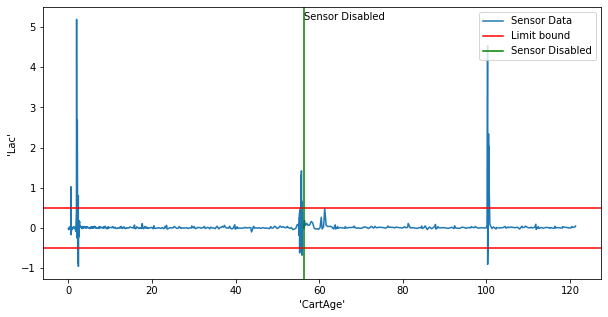

In [39]:
print("Sensor Lac Failed at Calibration Type B")
print("Sensor Disabled time:"+timestamp)
print("Sensor Disabled age:",cart_age,"hrs")
print("Sensor data maximum value", sensor_data.max())
print("Sensor data minimum value", sensor_data.min())
plt.figure(figsize=(10,5))
sns.lineplot(x=age, y=sensor_data, label='Sensor Data')
plt.axhline(0.5, c='red',label="Limit bound")
plt.axhline(-0.5, c='red')
cart_age = np.float32(cart_age) 
plt.axvline(cart_age, c='green', label='Sensor Disabled')
plt.text(cart_age, sensor_data.max(),'Sensor Disabled')
plt.legend(loc=1)